## **SOMETHING WITH MNIST**

In [17]:
def count_parameters_conv(in_channels: int, out_channels: int, kernel_size: int, bias: bool):
    if bias:
        return (in_channels * kernel_size**2 + 1) * out_channels
    else:
        return (in_channels * kernel_size**2) * out_channels

In [18]:
count_parameters_conv(3, 10, 3, False)

270

In [19]:
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as T
from IPython.display import clear_output
from torch.optim import Adam
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from tqdm import tqdm
from time import perf_counter

In [20]:
def train(model: nn.Module) -> float:
    model.train()

    train_loss = 0

    for x, y in tqdm(train_loader, desc='Train'):
        optimizer.zero_grad()
        
        x = x.to("cuda")

        output = model(x)
        
        y = y.to("cuda")

        loss = loss_fn(output, y)

        train_loss += loss.item()

        loss.backward()

        optimizer.step()

    train_loss /= len(train_loader)
    
    return train_loss

In [21]:
@torch.inference_mode()
def evaluate(model: nn.Module, loader: DataLoader) -> (float, float):
    model.eval()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(loader, desc='Evaluation'):
        x = x.to("cuda")
        output = model(x)
        y = y.to("cuda")
        loss = loss_fn(output, y)

        total_loss += loss.item()

        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()

    total_loss /= len(loader)
    accuracy = correct / total

    return total_loss, accuracy

In [22]:
def plot_stats(
    train_loss: [float],
    valid_loss: [float],
    valid_accuracy: [float],
    title: str
):
    plt.figure(figsize=(16, 8))

    plt.title(title + ' loss')

    plt.plot(train_loss, label='Train loss')
    plt.plot(valid_loss, label='Valid loss')
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + ' accuracy')

    plt.plot(valid_accuracy)
    plt.grid()

    plt.show()

Сама сверточная сетка::::

In [23]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(4 * 4 * 64, 256),
    nn.ReLU(),
    nn.Linear(256, 10))

model = model.to("cuda")
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

In [24]:
mnist_train = MNIST(
    "../datasets/mnist",
    train=True,
    download=True,
    transform=T.ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../datasets/mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../datasets/mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../datasets/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../datasets/mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../datasets/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../datasets/mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../datasets/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../datasets/mnist/MNIST/raw



In [25]:
mnist_valid = MNIST(
    "../datasets/mnist",
    train=False,
    download=True,
    transform=T.ToTensor()
)

In [26]:
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
valid_loader = DataLoader(mnist_valid, batch_size=64, shuffle=False)

In [27]:
num_epochs = 100

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(model)

    valid_loss, valid_accuracy = evaluate(model, valid_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)

    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'CONV model')
    if valid_accuracy >= 0.993:
            break

print(f'Total training and evaluation time {perf_counter() - start:.5f}')


Train:  53%|█████▎    | 497/938 [00:05<00:05, 84.41it/s] 


KeyboardInterrupt: 

In [35]:
def create_conv_model() -> nn.Module:
    model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2),

    nn.Flatten(),
    nn.Linear(4 * 4 * 64, 256),
    nn.ReLU(),
    nn.Linear(256, 10))
    return model

In [85]:
def predict_num(element: int):
    i = mnist_valid[element][0][0]
    j = mnist_valid[element][1]
    
    i = torch.unsqueeze(i, 0)
    i = torch.unsqueeze(i, 0).to("cuda")
    output = model(i)
    _, y_pred = torch.max(output, 1)

    return (int(y_pred), j)

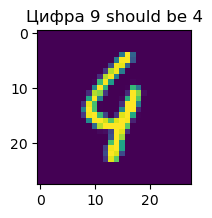

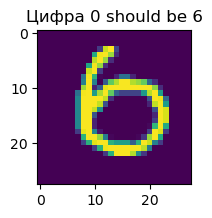

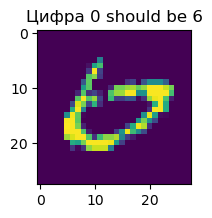

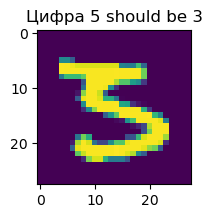

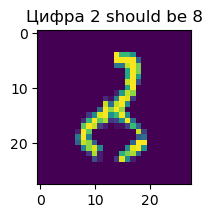

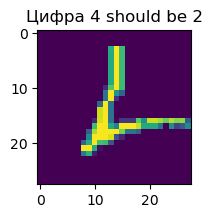

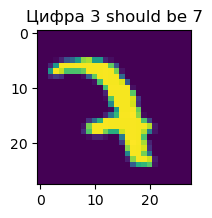

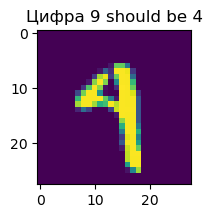

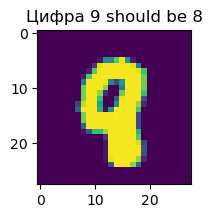

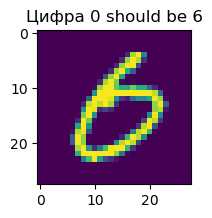

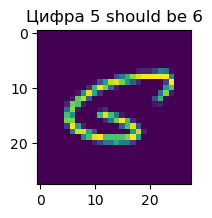

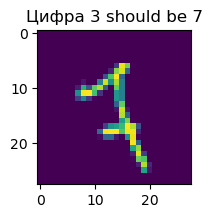

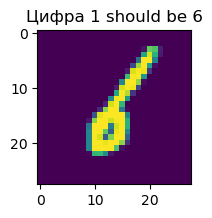

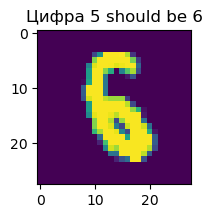

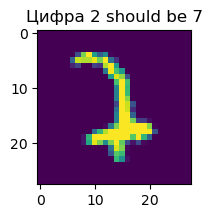

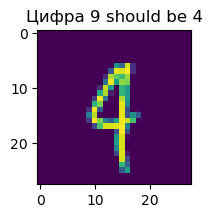

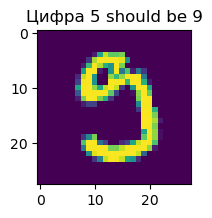

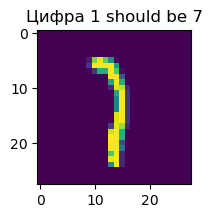

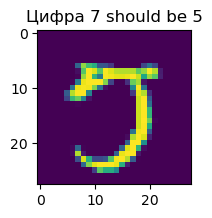

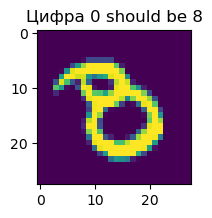

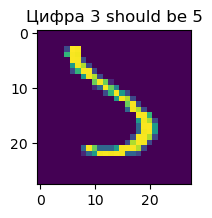

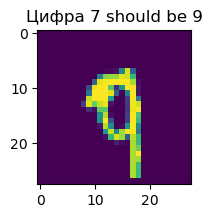

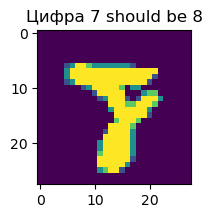

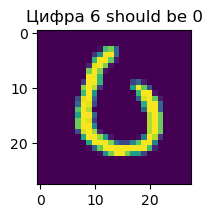

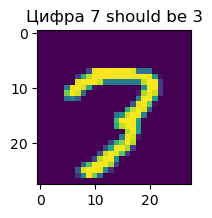

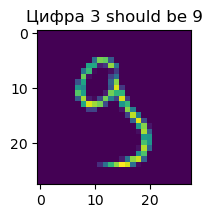

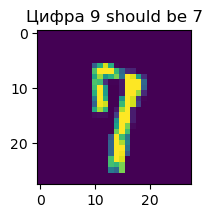

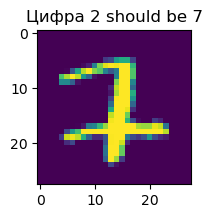

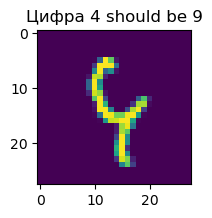

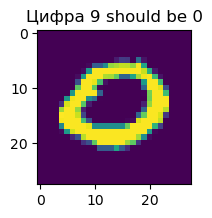

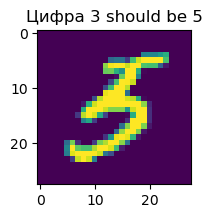

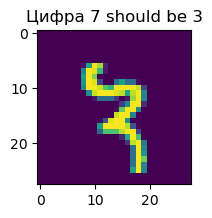

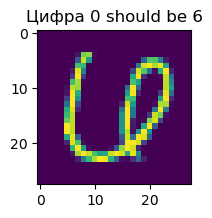

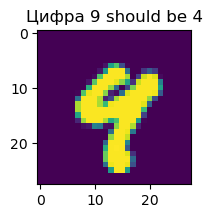

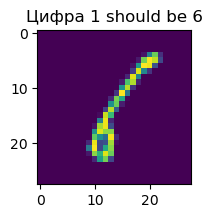

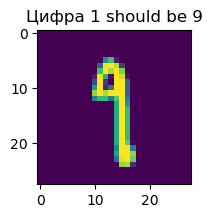

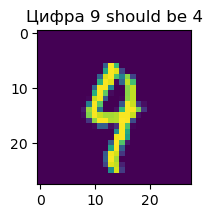

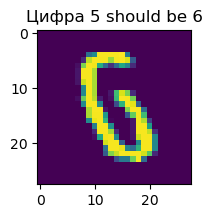

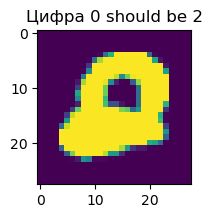

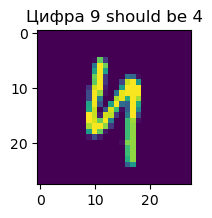

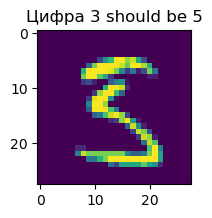

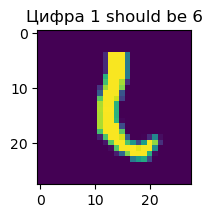

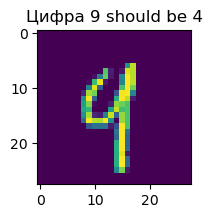

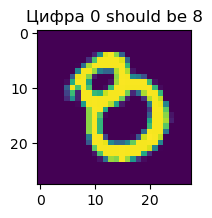

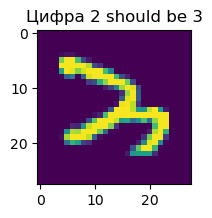

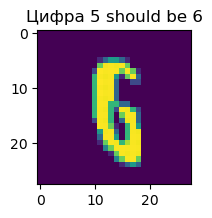

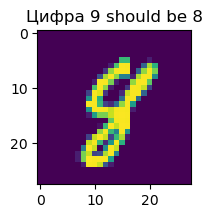

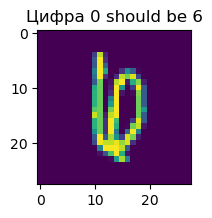

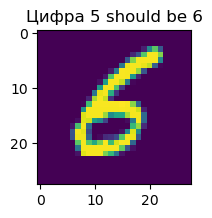

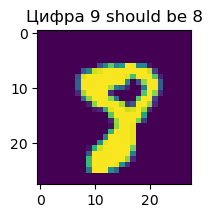

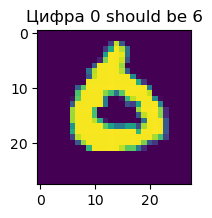

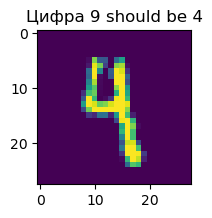

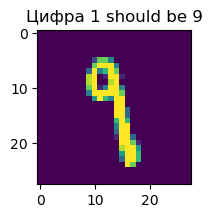

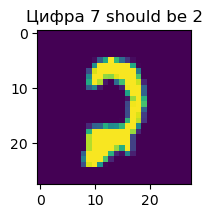

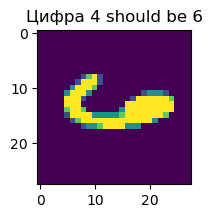

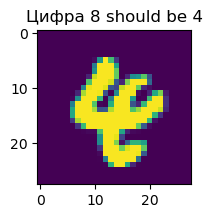

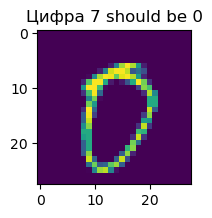

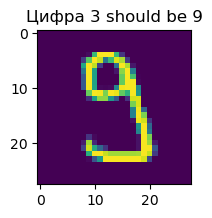

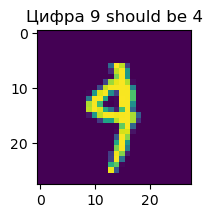

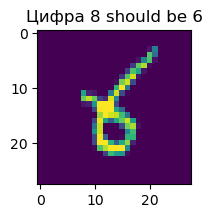

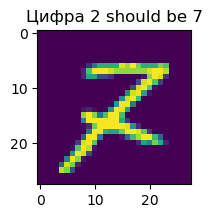

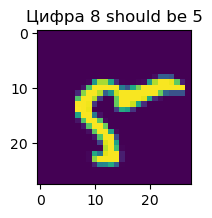

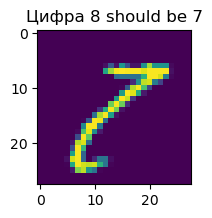

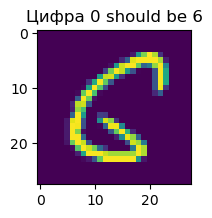

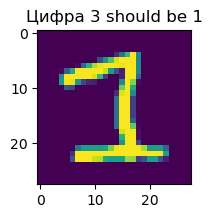

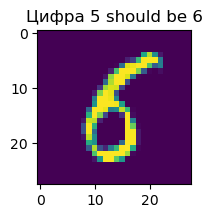

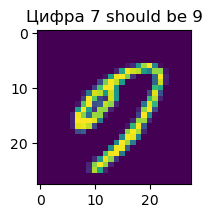

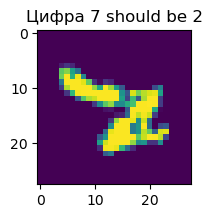

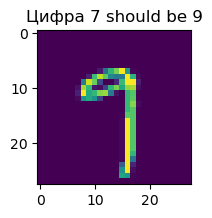

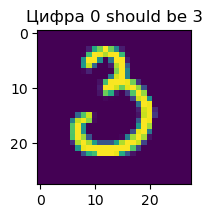

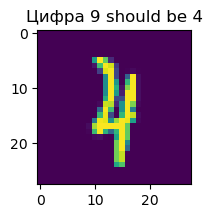

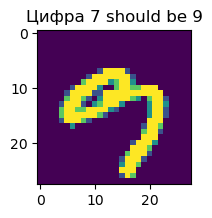

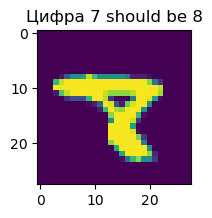

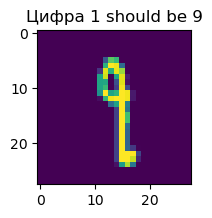

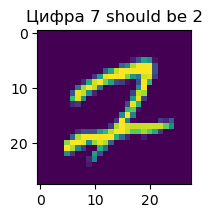

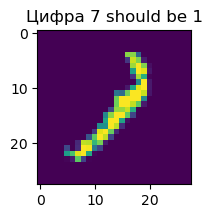

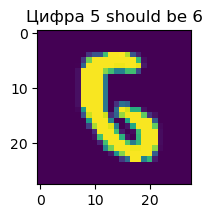

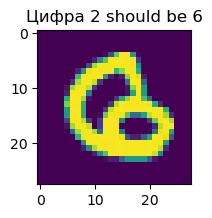

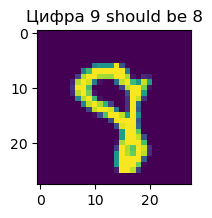

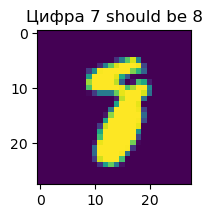

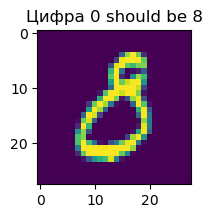

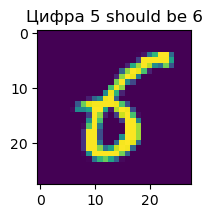

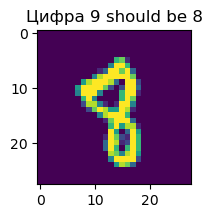

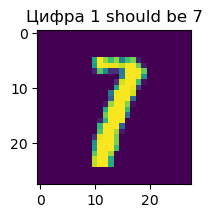

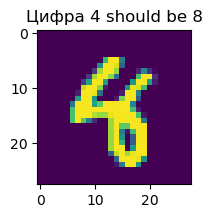

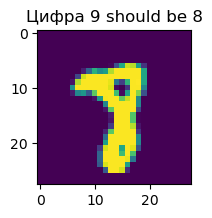

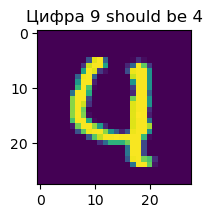

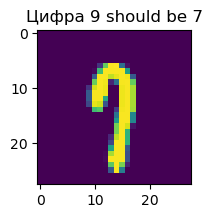

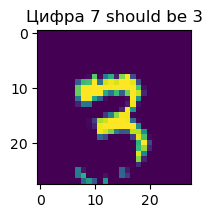

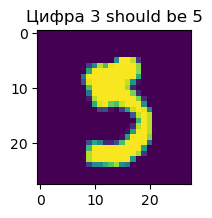

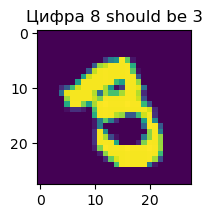

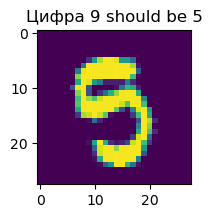

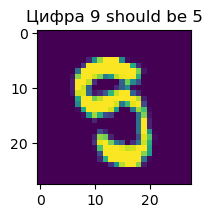

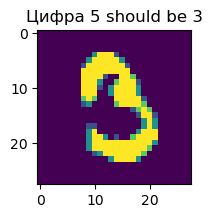

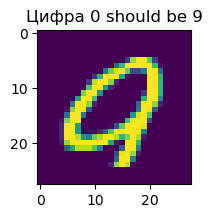

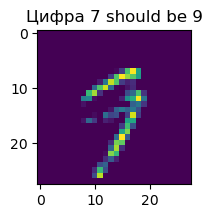

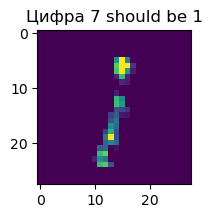

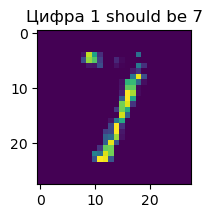

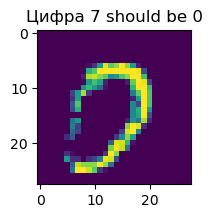

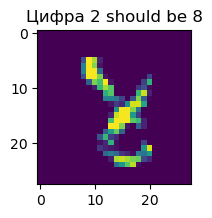

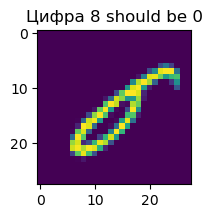

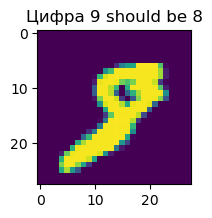

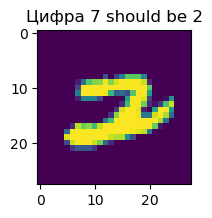

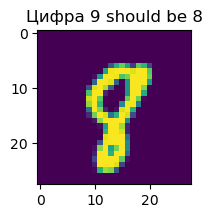

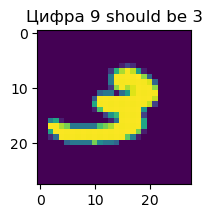

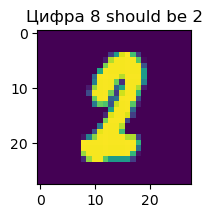

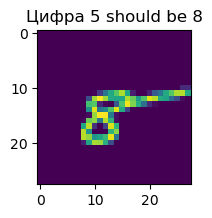

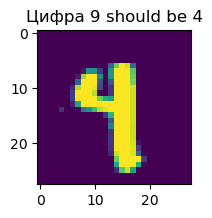

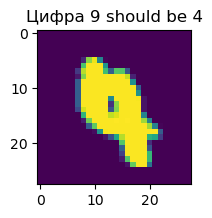

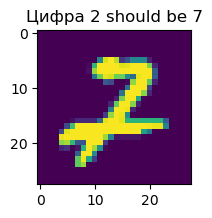

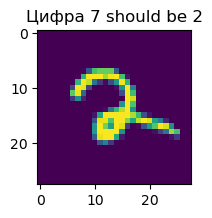

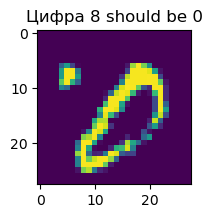

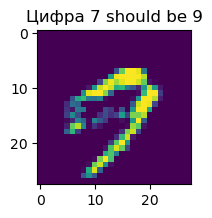

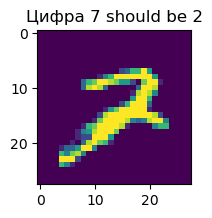

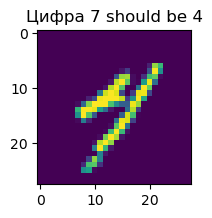

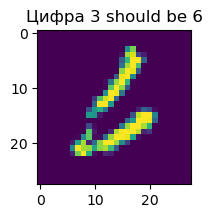

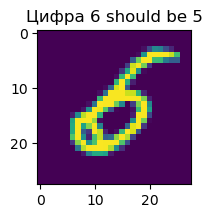

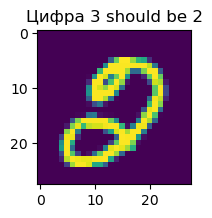

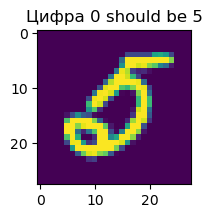

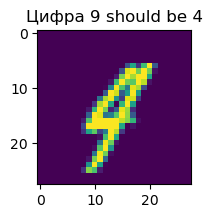

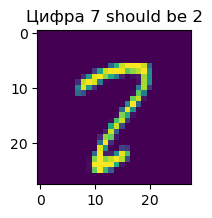

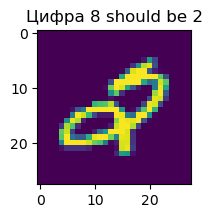

In [88]:
for i in range(10000):
    if predict_num(i)[0] != predict_num(i)[1]:
        plt.figure(figsize=(2, 2))
        plt.imshow(mnist_valid[i][0][0])
        plt.title(f'Цифра {predict_num(i)[0]} should be {predict_num(i)[1]}')
        plt.show()

        

In [100]:
def create_mlp_model() -> nn.Module:
    return nn.Sequential(
        nn.Flatten(), nn.Linear(28 * 28, 256), nn.ReLU(), nn.Linear(256, 10)
    )

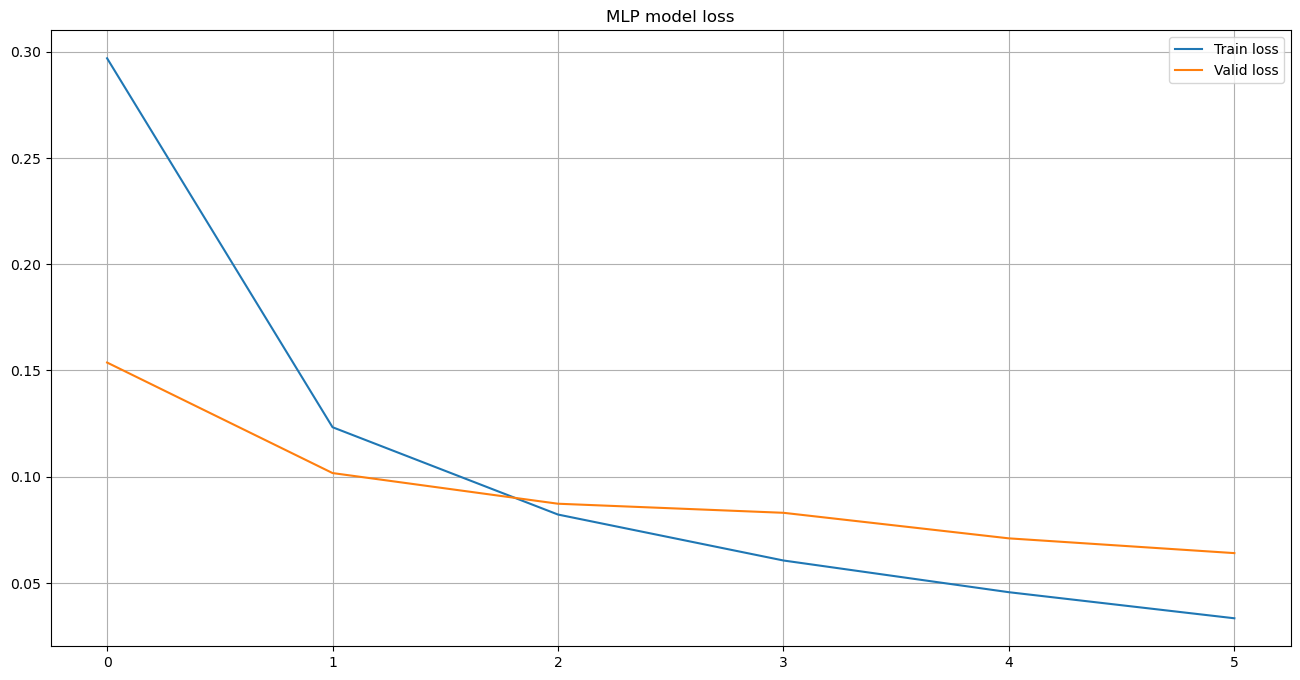

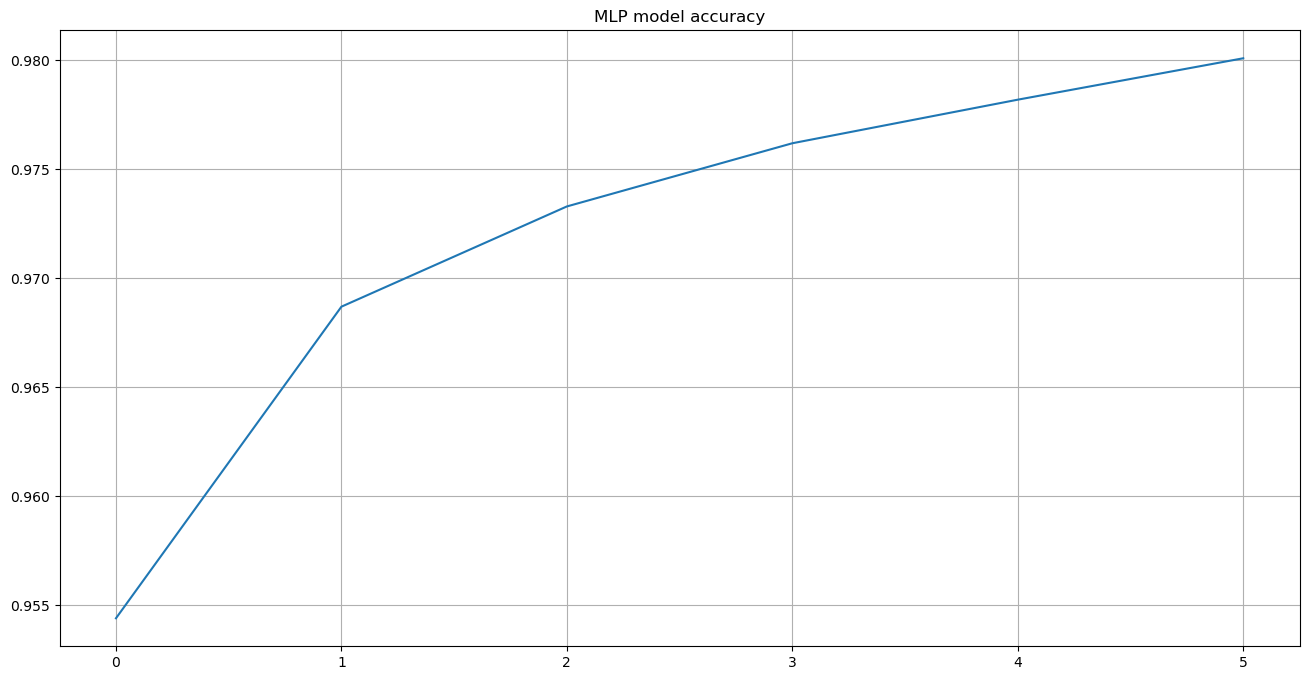

Total training and evaluation time 59.75124


In [101]:
md = create_mlp_model()

md = md.to("cuda")
optimizer = torch.optim.Adam(md.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

num_epochs = 100

train_loss_history, valid_loss_history = [], []
valid_accuracy_history = []

start = perf_counter()

for epoch in range(num_epochs):
    train_loss = train(md)

    valid_loss, valid_accuracy = evaluate(md, valid_loader)

    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)
    valid_accuracy_history.append(valid_accuracy)

    clear_output()

    plot_stats(train_loss_history, valid_loss_history, valid_accuracy_history, 'MLP model')
    if valid_accuracy >= 0.98:
            break

print(f'Total training and evaluation time {perf_counter() - start:.5f}')

In [102]:
torch.save(md.state_dict(), "model_mlp.pt")

## **4LESS**

In [2]:
import torch
batch = torch.rand((2, 3, 4, 5))
batch

tensor([[[[0.6832, 0.5117, 0.5828, 0.6223, 0.6801],
          [0.7295, 0.2176, 0.2091, 0.9295, 0.2569],
          [0.8954, 0.0470, 0.6625, 0.0252, 0.4829],
          [0.5407, 0.1152, 0.2121, 0.6008, 0.0512]],

         [[0.6386, 0.9777, 0.5038, 0.8319, 0.1565],
          [0.1058, 0.4546, 0.7567, 0.5553, 0.6932],
          [0.8336, 0.3206, 0.5697, 0.4985, 0.9266],
          [0.3892, 0.0183, 0.3838, 0.4749, 0.8836]],

         [[0.9095, 0.1251, 0.7231, 0.1321, 0.5040],
          [0.0401, 0.6727, 0.5256, 0.9904, 0.1325],
          [0.4096, 0.0338, 0.7860, 0.0403, 0.3253],
          [0.7513, 0.7212, 0.3267, 0.9880, 0.7633]]],


        [[[0.6522, 0.0310, 0.7789, 0.1103, 0.9329],
          [0.4696, 0.9970, 0.4795, 0.0935, 0.3144],
          [0.0254, 0.0895, 0.1162, 0.6511, 0.7955],
          [0.0113, 0.4348, 0.9271, 0.5418, 0.3908]],

         [[0.7485, 0.0011, 0.8839, 0.4399, 0.7063],
          [0.7092, 0.1329, 0.0096, 0.7653, 0.0520],
          [0.0804, 0.8874, 0.1166, 0.1307, 0.4252],
  

In [3]:
def get_normalize(features: torch.Tensor):
    means = features.mean(dim=(0, 2, 3))
    stds = features.std(dim=(0, 2, 3))

    return means, stds

In [4]:
get_normalize(batch)

(tensor([0.4475, 0.5159, 0.4328]), tensor([0.3078, 0.3080, 0.2959]))

In [5]:
import torchvision.transforms as T

def get_augmentations(train: bool = True, means = None, stds = None) -> T.Compose:
    if train:
        t = T.Compose(
            [
                T.RandomResizedCrop(size=32, scale=(0.8, 1.1)),
                T.RandomHorizontalFlip(p=0.5),
                T.RandomAdjustSharpness(sharpness_factor=2),
                T.ToTensor(),
                T.Normalize(mean=means, std=stds)
            ]
        )
        return t
    t = T.Compose(
        [
            T.ToTensor(),
            T.Normalize(mean=means, std=stds)
        ]
    )
    return t

    
    

In [6]:
get_augmentations(False)

Compose(
    ToTensor()
    Normalize(mean=None, std=None)
)

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


@torch.inference_mode()
def predict(model: nn.Module, loader: DataLoader, device: torch.device):
    model.eval()

    prediction = []

    for x, _ in loader:
        output = model(x.to(device)).cpu()

        prediction.append(torch.argmax(output, dim=1))

    prediction = torch.cat(prediction)

    return prediction

In [8]:
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as T
from IPython.display import clear_output
from torch.optim import Adam
from torch.optim import Optimizer
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from tqdm import tqdm


def set_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)


def train(
    model: nn.Module,
    data_loader: DataLoader,
    optimizer: Optimizer,
    loss_fn,
    device: torch.device,
) -> (float, float):
    model.train()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(data_loader, desc="Train"):
        x, y = x.to(device), y.to(device)

        optimizer.zero_grad()

        output = model(x)

        loss = loss_fn(output, y)

        loss.backward()

        total_loss += loss.item()

        optimizer.step()

        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()

    return total_loss / len(data_loader), correct / total


@torch.inference_mode()
def evaluate(
    model: nn.Module, data_loader: DataLoader, loss_fn, device: torch.device
) -> (float, float):
    model.eval()

    total_loss = 0
    total = 0
    correct = 0

    for x, y in tqdm(data_loader, desc="Evaluate"):
        x, y = x.to(device), y.to(device)

        output = model(x)

        loss = loss_fn(output, y)

        total_loss += loss.item()

        _, y_pred = torch.max(output, 1)
        total += y.size(0)
        correct += (y_pred == y).sum().item()

    return total_loss / len(data_loader), correct / total


def plot_stats(
    train_loss: [float],
    valid_loss: [float],
    train_accuracy: [float],
    valid_accuracy: [float],
    title: str,
):
    plt.figure(figsize=(16, 8))

    plt.title(title + " loss")

    plt.plot(train_loss, label="Train loss")
    plt.plot(valid_loss, label="Valid loss")
    plt.legend()
    plt.grid()

    plt.show()

    plt.figure(figsize=(16, 8))

    plt.title(title + " accuracy")

    plt.plot(train_accuracy, label="Train accuracy")
    plt.plot(valid_accuracy, label="Valid accuracy")
    plt.legend()
    plt.grid()

    plt.show()


def whole_train_valid_cycle(
    model, train_loader, valid_loader, optimizer, loss_fn, device, threshold, title
):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(100):
        train_loss, train_accuracy = train(
            model, train_loader, optimizer, loss_fn, device
        )
        valid_loss, valid_accuracy = evaluate(model, valid_loader, loss_fn, device)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        clear_output(wait=True)

        plot_stats(
            train_loss_history,
            valid_loss_history,
            train_accuracy_history,
            valid_accuracy_history,
            title,
        )

        if valid_accuracy >= threshold:
            break


def main(func, threshold, title):
    set_seed(0xDEADF00D)

    dataset = CIFAR10("cifar10", train=True, download=True, transform=T.ToTensor())

    means = (dataset.data / 255).mean(axis=(0, 1, 2))
    stds = (dataset.data / 255).std(axis=(0, 1, 2))

    train_transforms = T.Compose(
        [
            T.RandomResizedCrop(size=32, scale=(0.8, 1.1)),
            T.RandomHorizontalFlip(p=0.5),
            T.RandomAdjustSharpness(sharpness_factor=2),
            T.ToTensor(),
            T.Normalize(mean=means, std=stds),
        ]
    )

    test_transforms = T.Compose([T.ToTensor(), T.Normalize(mean=means, std=stds)])

    dataset_train = CIFAR10(
        "cifar10", train=True, download=True, transform=train_transforms
    )
    dataset_valid = CIFAR10(
        "cifar10", train=False, download=True, transform=test_transforms
    )

    train_loader = DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=8, pin_memory=True)
    valid_loader = DataLoader(dataset_valid, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = func().to(device)

    optimizer = Adam(model.parameters(), lr=1e-3)

    loss_fn = nn.CrossEntropyLoss()

    whole_train_valid_cycle(
        model, train_loader, valid_loader, optimizer, loss_fn, device, threshold, title
    )

    torch.save(predict(model, valid_loader, device), "prediction.pt")

def create_simple_conv_cifar():
    return nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1), # 32 x 32 x 16
        nn.ReLU(),

        nn.MaxPool2d(2),

        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1), # 16 x 16 x 32
        nn.ReLU(),

        nn.MaxPool2d(2),  # 8 x 8 x 32

        nn.Flatten(),

        nn.Linear(8 * 8 * 32, 1024), 
        nn.ReLU(),
        nn.Linear(1024, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )

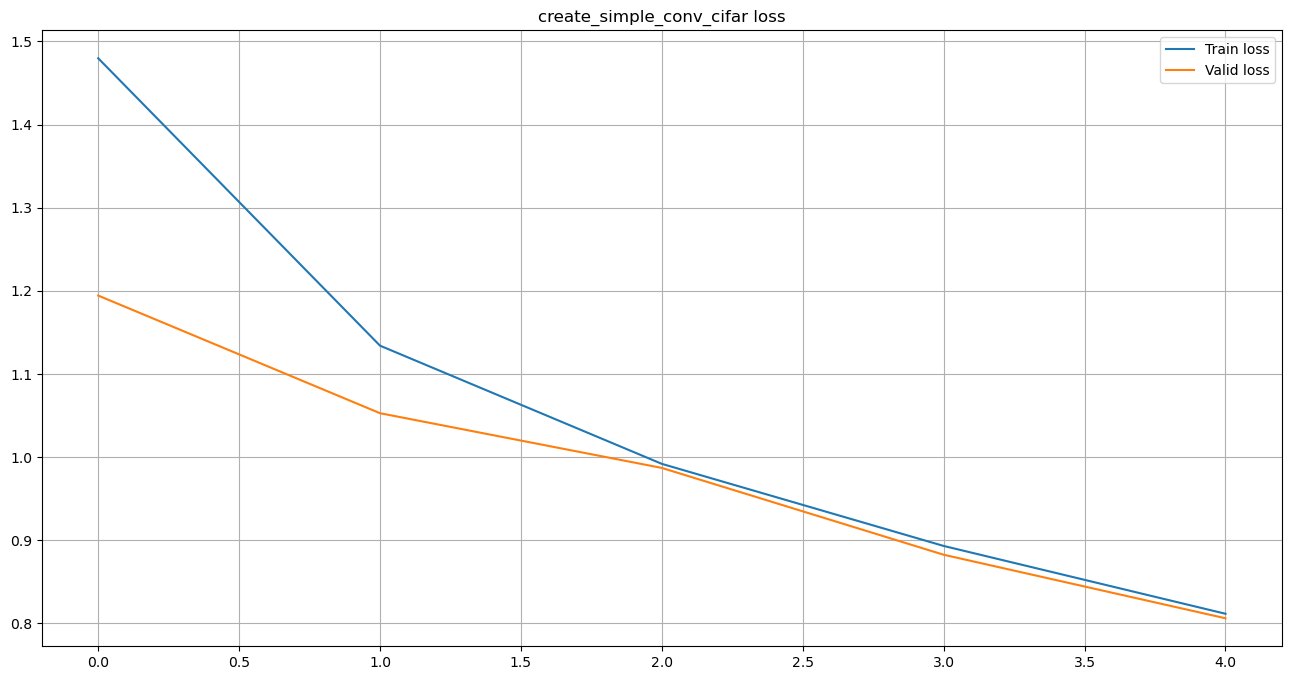

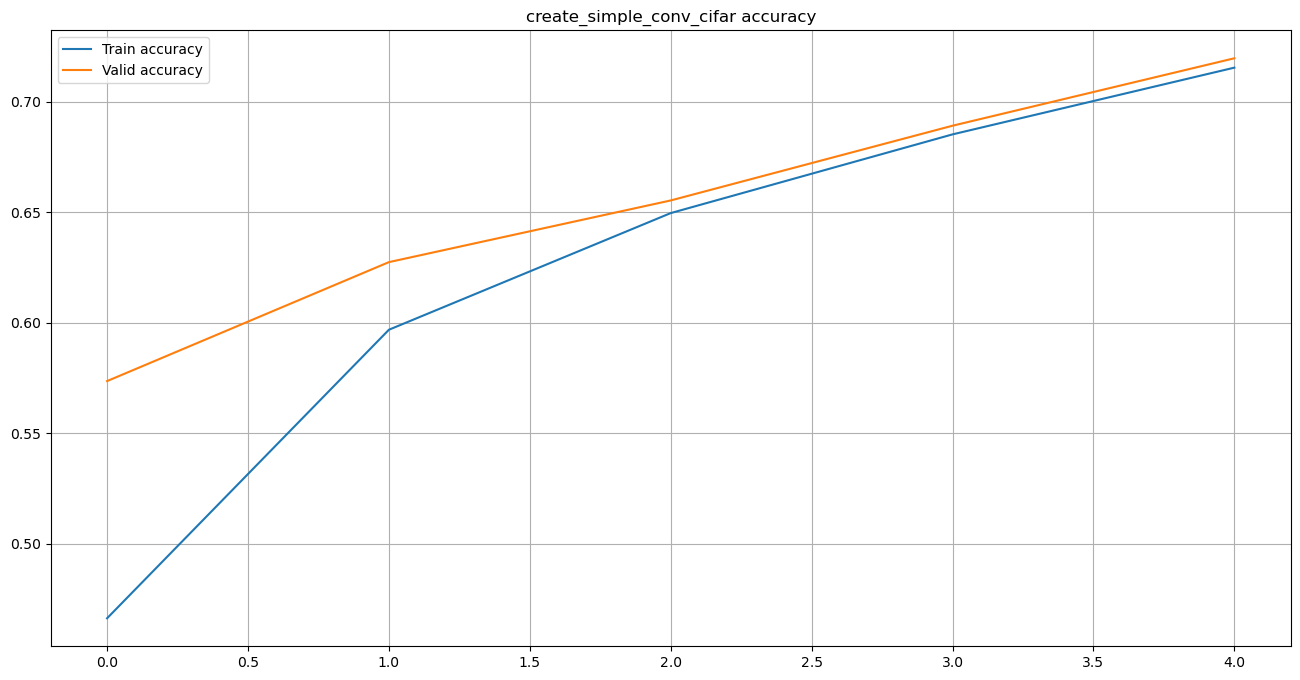

In [11]:
main(create_simple_conv_cifar, 0.7, 'create_simple_conv_cifar')

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)
print(torch.cuda.get_device_name())

cuda
Tesla T4


In [12]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader


@torch.inference_mode()
def predict_tta(model: nn.Module, loader: DataLoader, device: torch.device, iterations: int = 2):
    model.eval()

    prediction = []

    for iteration in range(iterations):
        single_prediction = []

        for x, _ in loader:
            output = model(x.to(device))

            single_prediction.append(output)

        prediction.append(torch.vstack(single_prediction))

    prediction = torch.argmax(torch.mean(torch.stack(prediction), dim=0), dim=1)

    return prediction

In [13]:
from torch.optim.lr_scheduler import StepLR


def whole_train_valid_cycle(
    model, train_loader, valid_loader, optimizer, loss_fn, scheduler, device, threshold, title
):
    train_loss_history, valid_loss_history = [], []
    train_accuracy_history, valid_accuracy_history = [], []

    for epoch in range(100):
        train_loss, train_accuracy = train(
            model, train_loader, optimizer, loss_fn, device
        )
        valid_loss, valid_accuracy = evaluate(model, valid_loader, loss_fn, device)

        train_loss_history.append(train_loss)
        valid_loss_history.append(valid_loss)

        train_accuracy_history.append(train_accuracy)
        valid_accuracy_history.append(valid_accuracy)

        clear_output(wait=True)

        plot_stats(
            train_loss_history,
            valid_loss_history,
            train_accuracy_history,
            valid_accuracy_history,
            title,
        )

        scheduler.step()

        if valid_accuracy >= threshold:
            break


In [14]:
import torch.nn as nn


def create_advanced_conv_cifar():
    return nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),

        nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),

        nn.MaxPool2d(2),
        nn.Dropout2d(p=0.2),

        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.MaxPool2d(2),
        nn.Dropout2d(p=0.2),

        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),

        nn.MaxPool2d(2),
        nn.Dropout2d(p=0.2),

        nn.Flatten(),

        nn.Linear(4 * 4 * 128, 512),
        nn.BatchNorm1d(512),
        nn.Dropout(p=0.3),
        nn.ReLU(),
        nn.Linear(512, 100)
    )

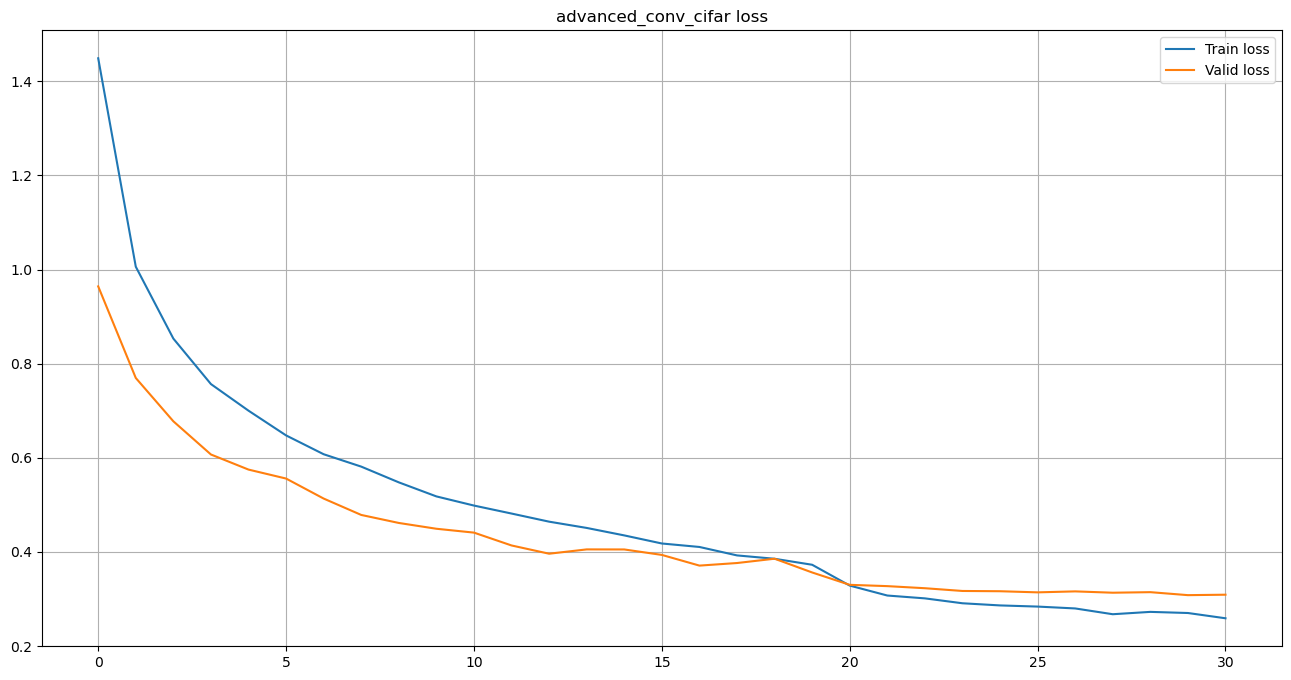

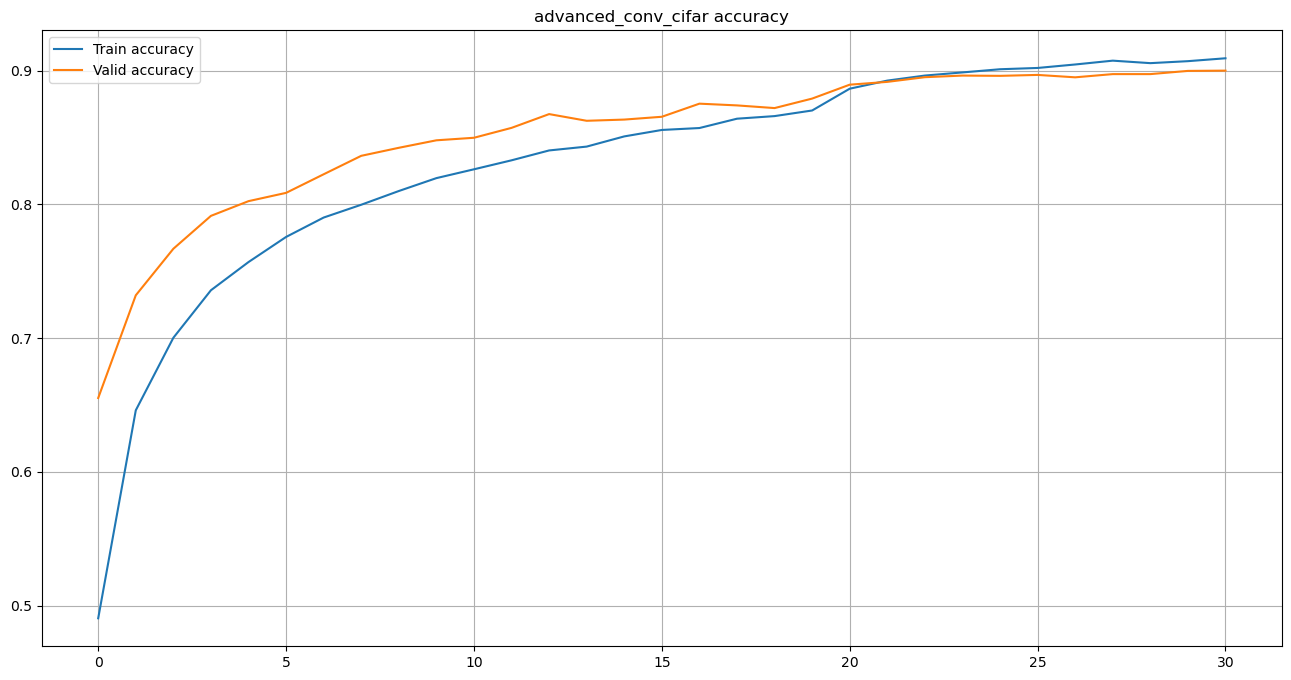

Files already downloaded and verified


In [15]:
title = 'advanced_conv_cifar'
threshold = 0.9

set_seed(0xDEADF00D)

dataset = CIFAR10("cifar10", train=True, download=True, transform=T.ToTensor())

means = (dataset.data / 255).mean(axis=(0, 1, 2))
stds = (dataset.data / 255).std(axis=(0, 1, 2))

train_transforms = T.Compose(
    [
        T.RandomResizedCrop(size=32, scale=(0.8, 1.1)),
        T.RandomHorizontalFlip(p=0.5),
        T.RandomAdjustSharpness(sharpness_factor=2),
        T.ToTensor(),
        T.Normalize(mean=means, std=stds),
    ]
)

test_transforms = T.Compose([T.ToTensor(), T.Normalize(mean=means, std=stds)])

dataset_train = CIFAR10(
    "cifar10", train=True, download=True, transform=train_transforms
)
dataset_valid = CIFAR10(
    "cifar10", train=False, download=True, transform=test_transforms
)

train_loader = DataLoader(dataset_train, batch_size=128, shuffle=True, num_workers=8, pin_memory=True)
valid_loader = DataLoader(dataset_valid, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = create_advanced_conv_cifar().to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
scheduler = StepLR(optimizer, step_size=20, gamma=0.1)

loss_fn = nn.CrossEntropyLoss()

whole_train_valid_cycle(
    model, train_loader, valid_loader, optimizer, loss_fn, scheduler, device, threshold, title
)

torch.save(model.state_dict(), "model.pt")

dataset_valid_tta = CIFAR10("cifar10", train=False, download=True, transform=train_transforms)
valid_tta_loader = DataLoader(dataset_valid_tta, batch_size=128, shuffle=False, num_workers=8, pin_memory=True)

torch.save(predict_tta(model, valid_tta_loader, device, iterations=20), "prediction_tta.pt")


In [114]:
data = CIFAR10('/home/jupyter/mnt/datasets/cifar10', download=True, transform=T.ToTensor())

Files already downloaded and verified


In [167]:
targets = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [184]:
def check_cifar(x: int):
    i = data[x][0]
    j = data[x][1]
    transform = T.ToPILImage()
    i = torch.unsqueeze(i, 0).to("cuda")
    output = model(i)
    _, y_pred = torch.max(output, 1)
    plt.figure(figsize=(2, 2))
    plt.imshow(transform(data[x][0]))
    plt.title(f'{targets[int(y_pred)]} should be {targets[j]}')
    plt.show()

In [ ]:


def get_pretrained_model(model_name: str, num_classes: int, pretrained: bool=True):
    